In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy.interpolate import griddata

# Carga de datos
### Carga de datos de las estaciones

In [153]:
#Lectura de estaciones
columns =['Estación','VelViento','DirViento','PM10','Pm2.5']
data_estaciones = pd.read_csv('../estaciones.txt',header=None, names=columns)
data_estaciones
#Bolivia porque no tiene ningun dato de PM 2.5 para el 22/01/2024
#Fontibon tiene formato diferente y extraño en fecha hora

,Estación,VelViento,DirViento,PM10,Pm2.5
0,Estación,VelViento,DirViento,PM10,Pm2.5
1,Guaymaral,True,True,True,True
2,Suba,True,True,True,True
3,Colina,True,True,True,True
4,Bolivia,False,False,False,True
5,Usaquén,True,True,True,True
6,Las Ferias,True,True,True,True
7,Fontibón,True,True,True,True
8,Estación Movil Fontibón,False,False,True,True
9,Centro de Alto Rendimiento,True,True,True,True


### Carga de datos de polución

In [154]:
#No usamos Bolivia, Movil_Fontibon ni Usme porque para estas estaciones no hay datos del viento
files = ['Carvajal_-_Sevillana','Centro_de_Alto_Rendimiento','Ciudad_Bolivar','Colina','Guaymaral','Jazmin','Kennedy','Las_Ferias','MinAmbiente','Movil_7ma','Puente_Aranda','San_Cristobal','Suba','Tunal','Usaquen']

def read_and_rename(file_prefix):
    df_pm10 = pd.read_excel(f'raw_data/{file_prefix}_PM10_22-01-2024.xlsx', skiprows=[0, 2]).rename(columns={'PM10': f'PM10{file_prefix[:7]}'})
    df_pm25 = pd.read_excel(f'raw_data/{file_prefix}_PM2.5_22-01-2024.xlsx', skiprows=[0, 2]).rename(columns={'Pm25': f'PM2.5{file_prefix[:7]}'})
    return pd.merge(df_pm10, df_pm25, on='fecha hora', how='inner')

df_enero22 = read_and_rename(files[0])
for file in files[1:]:
    df_enero22 = pd.merge(df_enero22, read_and_rename(file), on='fecha hora', how='inner')

df_enero22


,fecha hora,PM10Carvaja,PM2.5Carvaja,PM10Centro_,PM2.5Centro_,PM10Ciudad_,PM2.5Ciudad_,PM10Colina,PM2.5Colina,PM10Guaymar,...,PM10Puente_,PM2.5Puente_,PM10San_Cri,PM2.5San_Cri,PM10Suba,PM2.5Suba,PM10Tunal,PM2.5Tunal,PM10Usaquen,PM2.5Usaquen
0,22-01-2024 01:00,24.0,17,NaN,NaN,18.0,8.0,37,5,24,...,NaN,4,16.0,7,48.0,18,14,11.0,10,0
1,22-01-2024 02:00,27.0,16,NaN,NaN,17.0,6.0,26,5,28,...,NaN,4,8.0,8,56.0,14,26,12.0,9,0
2,22-01-2024 03:00,25.0,20,NaN,NaN,12.0,8.0,19,5,19,...,NaN,4,8.0,7,54.0,8,23,10.0,10,5
3,22-01-2024 04:00,35.0,19,NaN,NaN,9.0,7.0,19,5,31,...,NaN,4,NaN,10,41.0,23,10,5.0,19,8
4,22-01-2024 05:00,39.0,20,NaN,NaN,9.0,9.0,15,5,15,...,NaN,4,10.0,10,51.0,39,10,8.0,8,4
5,22-01-2024 06:00,66.0,38,NaN,NaN,10.0,8.0,13,5,15,...,NaN,4,13.0,10,70.0,36,19,13.0,8,5
6,22-01-2024 07:00,58.0,27,NaN,NaN,15.0,7.0,14,5,31,...,NaN,5,19.0,9,73.0,32,25,11.0,23,8
7,22-01-2024 08:00,68.0,28,6.0,4.0,13.0,6.0,15,5,45,...,5.0,5,17.0,7,97.0,21,25,11.0,22,22
8,22-01-2024 09:00,72.0,32,13.0,4.0,20.0,NaN,25,5,27,...,16.0,5,12.0,12,88.0,12,31,14.0,28,11
9,22-01-2024 10:00,52.0,22,10.0,4.0,15.0,NaN,28,6,27,...,25.0,5,18.0,6,74.0,7,22,22.0,14,6


In [155]:
df_enero22 = pd.merge(
    pd.merge(df_enero22,pd.read_excel('raw_data/Fontibon_PM10_22-01-2024.xlsx', skiprows=[0, 2]).rename(columns={'PM10': f'PM10Fontibo'}).dropna().reset_index(drop=True),
            on='fecha hora', how='inner'),
            pd.read_excel('raw_data/Fontibon_PM2.5_22-01-2024.xlsx', skiprows=[0, 2]).rename(columns={'Pm25': f'PM2.5Fontibo'}).dropna().reset_index(drop=True),
            on='fecha hora', how='inner')
df_enero22

,fecha hora,PM10Carvaja,PM2.5Carvaja,PM10Centro_,PM2.5Centro_,PM10Ciudad_,PM2.5Ciudad_,PM10Colina,PM2.5Colina,PM10Guaymar,...,PM10San_Cri,PM2.5San_Cri,PM10Suba,PM2.5Suba,PM10Tunal,PM2.5Tunal,PM10Usaquen,PM2.5Usaquen,PM10Fontibo,PM2.5Fontibo
0,22-01-2024 01:00,24.0,17,NaN,NaN,18.0,8.0,37,5,24,...,16.0,7,48.0,18,14,11.0,10,0,18.0,8.0
1,22-01-2024 02:00,27.0,16,NaN,NaN,17.0,6.0,26,5,28,...,8.0,8,56.0,14,26,12.0,9,0,19.0,10.0
2,22-01-2024 03:00,25.0,20,NaN,NaN,12.0,8.0,19,5,19,...,8.0,7,54.0,8,23,10.0,10,5,14.0,12.0
3,22-01-2024 04:00,35.0,19,NaN,NaN,9.0,7.0,19,5,31,...,NaN,10,41.0,23,10,5.0,19,8,11.0,8.0
4,22-01-2024 05:00,39.0,20,NaN,NaN,9.0,9.0,15,5,15,...,10.0,10,51.0,39,10,8.0,8,4,11.0,10.0
5,22-01-2024 06:00,66.0,38,NaN,NaN,10.0,8.0,13,5,15,...,13.0,10,70.0,36,19,13.0,8,5,20.0,11.0
6,22-01-2024 07:00,58.0,27,NaN,NaN,15.0,7.0,14,5,31,...,19.0,9,73.0,32,25,11.0,23,8,32.0,20.0
7,22-01-2024 08:00,68.0,28,6.0,4.0,13.0,6.0,15,5,45,...,17.0,7,97.0,21,25,11.0,22,22,44.0,33.0
8,22-01-2024 09:00,72.0,32,13.0,4.0,20.0,NaN,25,5,27,...,12.0,12,88.0,12,31,14.0,28,11,33.0,19.0
9,22-01-2024 10:00,52.0,22,10.0,4.0,15.0,NaN,28,6,27,...,18.0,6,74.0,7,22,22.0,14,6,20.0,11.0


In [156]:
df_enero22.shape

(24, 33)

In [157]:
df_enero22.columns

Index(['fecha hora', 'PM10Carvaja', 'PM2.5Carvaja', 'PM10Centro_',
       'PM2.5Centro_', 'PM10Ciudad_', 'PM2.5Ciudad_', 'PM10Colina',
       'PM2.5Colina', 'PM10Guaymar', 'PM2.5Guaymar', 'PM10Jazmin',
       'PM2.5Jazmin', 'PM10Kennedy', 'PM2.5Kennedy', 'PM10Las_Fer',
       'PM2.5Las_Fer', 'PM10MinAmbi', 'PM2.5MinAmbi', 'PM10Movil_7',
       'PM2.5Movil_7', 'PM10Puente_', 'PM2.5Puente_', 'PM10San_Cri',
       'PM2.5San_Cri', 'PM10Suba', 'PM2.5Suba', 'PM10Tunal', 'PM2.5Tunal',
       'PM10Usaquen', 'PM2.5Usaquen', 'PM10Fontibo', 'PM2.5Fontibo'],
      dtype='object')

# Limpieza de datos

In [158]:
# Rellenar los valores NaN con el valor anterior en la columna
df_enero22.fillna(value=-1) #aún no es inplace

,fecha hora,PM10Carvaja,PM2.5Carvaja,PM10Centro_,PM2.5Centro_,PM10Ciudad_,PM2.5Ciudad_,PM10Colina,PM2.5Colina,PM10Guaymar,...,PM10San_Cri,PM2.5San_Cri,PM10Suba,PM2.5Suba,PM10Tunal,PM2.5Tunal,PM10Usaquen,PM2.5Usaquen,PM10Fontibo,PM2.5Fontibo
0,22-01-2024 01:00,24.0,17,-1.0,-1.0,18.0,8.0,37,5,24,...,16.0,7,48.0,18,14,11.0,10,0,18.0,8.0
1,22-01-2024 02:00,27.0,16,-1.0,-1.0,17.0,6.0,26,5,28,...,8.0,8,56.0,14,26,12.0,9,0,19.0,10.0
2,22-01-2024 03:00,25.0,20,-1.0,-1.0,12.0,8.0,19,5,19,...,8.0,7,54.0,8,23,10.0,10,5,14.0,12.0
3,22-01-2024 04:00,35.0,19,-1.0,-1.0,9.0,7.0,19,5,31,...,-1.0,10,41.0,23,10,5.0,19,8,11.0,8.0
4,22-01-2024 05:00,39.0,20,-1.0,-1.0,9.0,9.0,15,5,15,...,10.0,10,51.0,39,10,8.0,8,4,11.0,10.0
5,22-01-2024 06:00,66.0,38,-1.0,-1.0,10.0,8.0,13,5,15,...,13.0,10,70.0,36,19,13.0,8,5,20.0,11.0
6,22-01-2024 07:00,58.0,27,-1.0,-1.0,15.0,7.0,14,5,31,...,19.0,9,73.0,32,25,11.0,23,8,32.0,20.0
7,22-01-2024 08:00,68.0,28,6.0,4.0,13.0,6.0,15,5,45,...,17.0,7,97.0,21,25,11.0,22,22,44.0,33.0
8,22-01-2024 09:00,72.0,32,13.0,4.0,20.0,-1.0,25,5,27,...,12.0,12,88.0,12,31,14.0,28,11,33.0,19.0
9,22-01-2024 10:00,52.0,22,10.0,4.0,15.0,-1.0,28,6,27,...,18.0,6,74.0,7,22,22.0,14,6,20.0,11.0


In [159]:
df_enero22.isna().sum(axis=1).idxmin()

7

In [160]:
PM10 = df_enero22.sort_index(axis=1).drop(columns=['fecha hora']).iloc[7][:16].values #Tenemos 16 estaciones
df_enero22.sort_index(axis=1).drop(columns=['fecha hora']).iloc[7][:16]

PM10Carvaja    68.0
PM10Centro_     6.0
PM10Ciudad_    13.0
PM10Colina     15.0
PM10Fontibo    44.0
PM10Guaymar    45.0
PM10Jazmin     14.0
PM10Kennedy    36.0
PM10Las_Fer    17.0
PM10MinAmbi    40.0
PM10Movil_7    14.0
PM10Puente_     5.0
PM10San_Cri    17.0
PM10Suba       97.0
PM10Tunal      25.0
PM10Usaquen    22.0
Name: 7, dtype: float64

# Analisis de datos

In [161]:
coord = pd.read_csv('../estaciones_coord.txt')
coord['PM10'] = PM10
coord.iloc[:, [0, -4,-2, -1]].sort_values(by=['Estación'])

,Estación,PM10,y_cell,x_cell
11,Carvajal-Sevillana,5.0,4,3
6,Centro de Alto Rendimiento,14.0,6,5
13,Ciudad Bolivar,97.0,3,2
2,Colina,13.0,10,6
5,Fontibón,45.0,7,3
0,Guaymaral,68.0,12,7
12,Jazmín,17.0,4,4
8,Kennedy,17.0,5,2
4,Las Ferias,44.0,8,5
10,Ministerio de Ambiente,14.0,5,6


In [162]:
Ly, Lx = 14, 10 
grid =  np.zeros((Ly, Lx))
values = np.array(coord[['x_cell', 'y_cell', 'PM10']])  

for i,j,k in values.astype(int):
    # print(i,j,k)
    grid[j,i] = k
grid

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 97., 25.,  0., 22.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 17.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0., 17.,  0., 40.,  0., 14.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 14., 36.,  0.,  0.,  0.],
       [ 0.,  0.,  0., 45.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0., 44.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 15.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  6.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0., 68.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [165]:
grid_x, grid_y = np.mgrid[0:20:10j, 0:20:14j]
grid_x.shape, grid_y.shape

((10, 14), (10, 14))

### Intepolacion de datos

In [167]:
points = np.array(coord[['x_cell', 'y_cell']])
magnitudes = np.array(coord['PM10'])

# direcciones = np.array((148,306,315,82,342,154,154,342,127,184))
# direcciones = direcciones*np.pi/180.0

# Crear una malla donde queremos interpolar los vectores
# grid_x, grid_y = np.mgrid[0:10:20j, 0:14:20j]
grid_x, grid_y = np.mgrid[0:20:10j, 0:20:14j]

# Interpolación para cada componente del vector
# # Usamos 'cubic' para áreas donde hay suficientes datos y 'nearest' donde no
grid_pm10_cubic = griddata(points, magnitudes, (grid_x, grid_y), method='cubic',)
grid_pm10_nearest = griddata(points, magnitudes, (grid_x, grid_y), method='nearest',)
grid_interpolated = np.where(np.isnan(grid_pm10_cubic), grid_pm10_nearest, grid_pm10_cubic)
grid_interpolated.shape

(10, 14)

# Visualizacion de datos

In [168]:

#@title Visualización de la grilla
def Mapa(data):
    # Cargar la imagen de fondo
    background_image = mpimg.imread('../Map.png')
    Lx, Ly = 10, 14
    # Crear el plot
    fig, ax = plt.subplots()

    # Mostrar la imagen de fondo
    ax.imshow(background_image, extent=[0, Lx, 0, Ly], aspect='auto')

    # Mostrar la grilla coloreada sobre la imagen de fondo
    # Ajustar alpha para hacer la grilla transparente
    min=np.min(data)
    max=np.max(data)
    cax = ax.imshow(data, cmap='gray_r', extent=[0, Lx, 0, Ly], origin='lower', 
                    alpha=0.7, vmin=min, vmax=max)


    # Agregar una barra de colores para referencia
    plt.colorbar(cax)

    # Configurar etiquetas y título (opcional)
    plt.title('Densidad de polución en la grilla')
    plt.xlabel('Columnas')
    plt.ylabel('Filas')

    # Mostrar el plot
    plt.show()

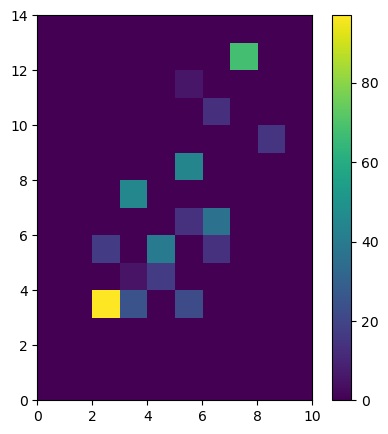

In [147]:
plt.figure(figsize=(5,5))
plt.imshow(grid, extent=[0, Lx, 0, Ly], origin='lower')
plt.colorbar()

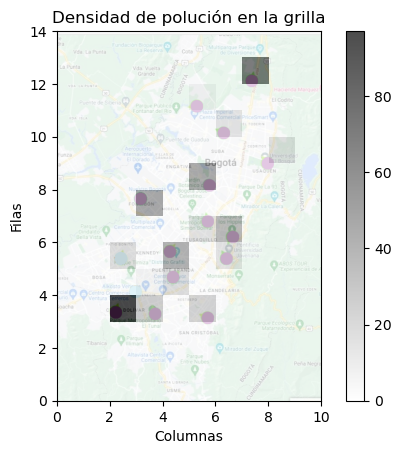

In [169]:
Mapa(grid)

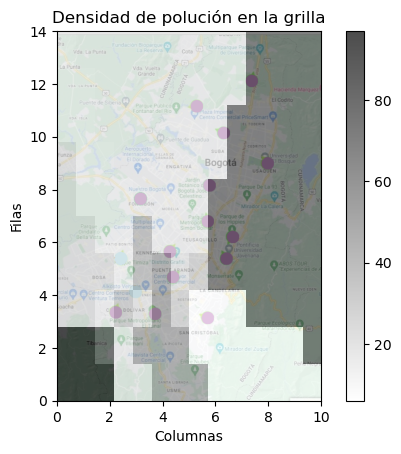

In [171]:
Mapa(grid_interpolated)